In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading in the data

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## Cleaning - First Pass

- Checking the raw data I found several numerical columns that were missing values. Initially I was going to set all these NaN values to '0'. However, I found that doing so affected the output of my models down the line, so I instead opted to fill those missing values with the 'median' of the column.

In [3]:
# Filling all numerical columns missing values

train['Lot Frontage'].fillna(train['Lot Frontage'].median(), inplace=True)
train['Mas Vnr Area'].fillna(train['Mas Vnr Area'].median(), inplace=True)
train['BsmtFin SF 1'].fillna(train['BsmtFin SF 1'].median(), inplace=True)
train['BsmtFin SF 2'].fillna(train['BsmtFin SF 2'].median(), inplace=True)
train['Bsmt Unf SF'].fillna(train['Bsmt Unf SF'].median(), inplace=True)
train['Total Bsmt SF'].fillna(train['Total Bsmt SF'].median(), inplace=True)
train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median(), inplace=True)
train['Garage Cars'].fillna(train['Garage Cars'].median(), inplace=True)
train['Garage Area'].fillna(train['Garage Area'].median(), inplace=True)
train['Bsmt Full Bath'].fillna(train['Bsmt Full Bath'].median(), inplace=True)
train['Bsmt Half Bath'].fillna(train['Bsmt Half Bath'].median(), inplace=True)

In [4]:
# Same process for testing data

test['Lot Frontage'].fillna(test['Lot Frontage'].median(), inplace=True)
test['Mas Vnr Area'].fillna(test['Mas Vnr Area'].median(), inplace=True)
test['Electrical'].fillna('Missing', inplace=True)
test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].median(), inplace=True)

- I noticed while reading the data description for this data set, that some columns were not the type that they were listed as. Therefore, I set the correct types for the columns with numerical values. Measurements like square footage need to be kept in float types since they can be continuous. Years and ages of things are non-continuous int's.

In [5]:
# Casting columns as types

train['Lot Area'] = train['Lot Area'].astype(float)
train['1st Flr SF'] = train['1st Flr SF'].astype(float)
train['2nd Flr SF'] = train['2nd Flr SF'].astype(float)
train['Low Qual Fin SF'] = train['Low Qual Fin SF'].astype(float)
train['Gr Liv Area'] = train['Gr Liv Area'].astype(float)
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].astype(int)
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].astype(int)
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype(int)
train['Garage Cars'] = train['Garage Cars'].astype(int)
train['Wood Deck SF'] = train['Wood Deck SF'].astype(float)
train['Open Porch SF'] = train['Open Porch SF'].astype(float)
train['Enclosed Porch'] = train['Enclosed Porch'].astype(float)
train['3Ssn Porch'] = train['3Ssn Porch'].astype(float)
train['Screen Porch'] = train['Screen Porch'].astype(float)
train['Pool Area'] = train['Pool Area'].astype(float)
train['Misc Val'] = train['Misc Val'].astype(float)
train['SalePrice'] = train['SalePrice'].astype(float)

In [6]:
# Same process for testing data

test['Lot Area'] = test['Lot Area'].astype(float)
test['1st Flr SF'] = test['1st Flr SF'].astype(float)
test['2nd Flr SF'] = test['2nd Flr SF'].astype(float)
test['Low Qual Fin SF'] = test['Low Qual Fin SF'].astype(float)
test['Gr Liv Area'] = test['Gr Liv Area'].astype(float)
test['Bsmt Full Bath'] = test['Bsmt Full Bath'].astype(int)
test['Bsmt Half Bath'] = test['Bsmt Half Bath'].astype(int)
test['Garage Yr Blt'] = test['Garage Yr Blt'].astype(int)
test['Garage Cars'] = test['Garage Cars'].astype(int)
test['Wood Deck SF'] = test['Wood Deck SF'].astype(float)
test['Open Porch SF'] = test['Open Porch SF'].astype(float)
test['Enclosed Porch'] = test['Enclosed Porch'].astype(float)
test['3Ssn Porch'] = test['3Ssn Porch'].astype(float)
test['Screen Porch'] = test['Screen Porch'].astype(float)
test['Pool Area'] = test['Pool Area'].astype(float)
test['Misc Val'] = test['Misc Val'].astype(float)


- The data description specifies in the 'SPECIAL NOTES' section that there are certain observations to be removed from the data set before being given to students. As recommended, any houses with more than 4000 square feet of General Living Area were removed from the training dataset.

In [7]:
# Removed outliers

train = train[train['Gr Liv Area'] < 4000]


In [8]:
# Saving cleaned data

train.to_csv('./datasets/train_cln.csv', index = False)
test.to_csv('./datasets/test_cln.csv', index = False)

## Baseline EDA

- I wanted to check if there were any variables I should keep my eye on and possible hone down the line for my linear model.
- I did this by checking the raw correlations of the numerical variables and the target variable 'SalePrice', creating pair plots of the top 11 variables that correlated most.

In [9]:
# Looked at raw training data correlation

train.corr()['SalePrice'].sort_values() 

PID               -0.255068
Enclosed Porch    -0.135713
Kitchen AbvGr     -0.125472
Overall Cond      -0.097093
MS SubClass       -0.087331
Id                -0.051416
Bsmt Half Bath    -0.045534
Low Qual Fin SF   -0.041608
Yr Sold           -0.015174
Misc Val          -0.010323
BsmtFin SF 2       0.016398
Pool Area          0.025805
Mo Sold            0.032508
3Ssn Porch         0.048721
Screen Porch       0.134555
Bedroom AbvGr      0.137145
Bsmt Unf SF        0.190284
2nd Flr SF         0.248826
Half Bath          0.283372
Bsmt Full Bath     0.284433
Lot Area           0.303744
Wood Deck SF       0.327629
Lot Frontage       0.338280
Open Porch SF      0.338545
BsmtFin SF 1       0.445680
Fireplaces         0.473783
TotRms AbvGrd      0.509775
Mas Vnr Area       0.511273
Garage Yr Blt      0.514436
Full Bath          0.538225
Year Remod/Add     0.550872
Year Built         0.572405
1st Flr SF         0.648252
Garage Cars        0.648574
Garage Area        0.655452
Total Bsmt SF      0

Text(0.5, 1.0, 'Heatmap of raw training data correlation')

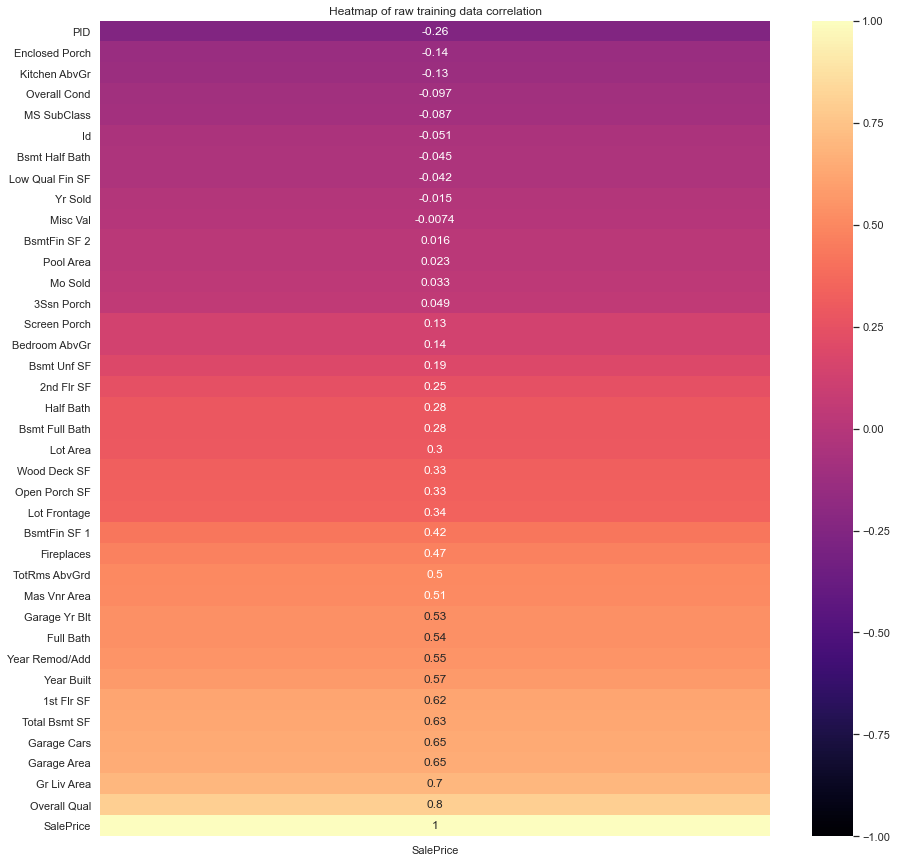

In [4]:
# Heatmap of raw training data correlation

correlation = train.corr()[['SalePrice']].sort_values('SalePrice')
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(data = correlation,
    vmin= -1,
    vmax= 1,
    cmap= 'magma',
    annot=True,
).set_title('Heatmap of raw training data correlation')

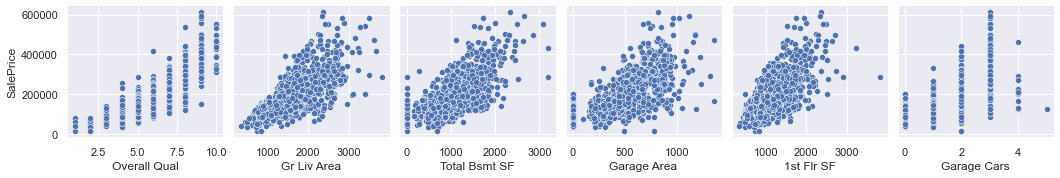

In [11]:
# Pairplots of raw variable correlation to SalePrice > 0.50, sperated for readablity

sns.pairplot(train, x_vars=['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Garage Cars'], y_vars=['SalePrice'])

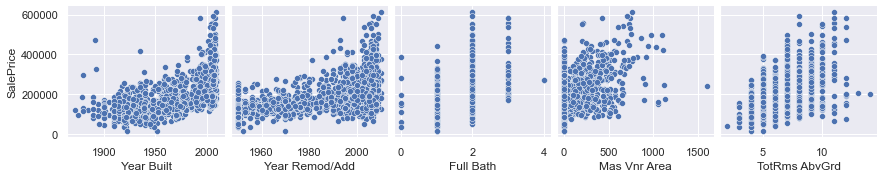

In [12]:
sns.pairplot(train, x_vars=['Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area','TotRms AbvGrd'], y_vars=['SalePrice'])

 - Here I wanted to check how many of the initial numerical variables had a normal distribution.

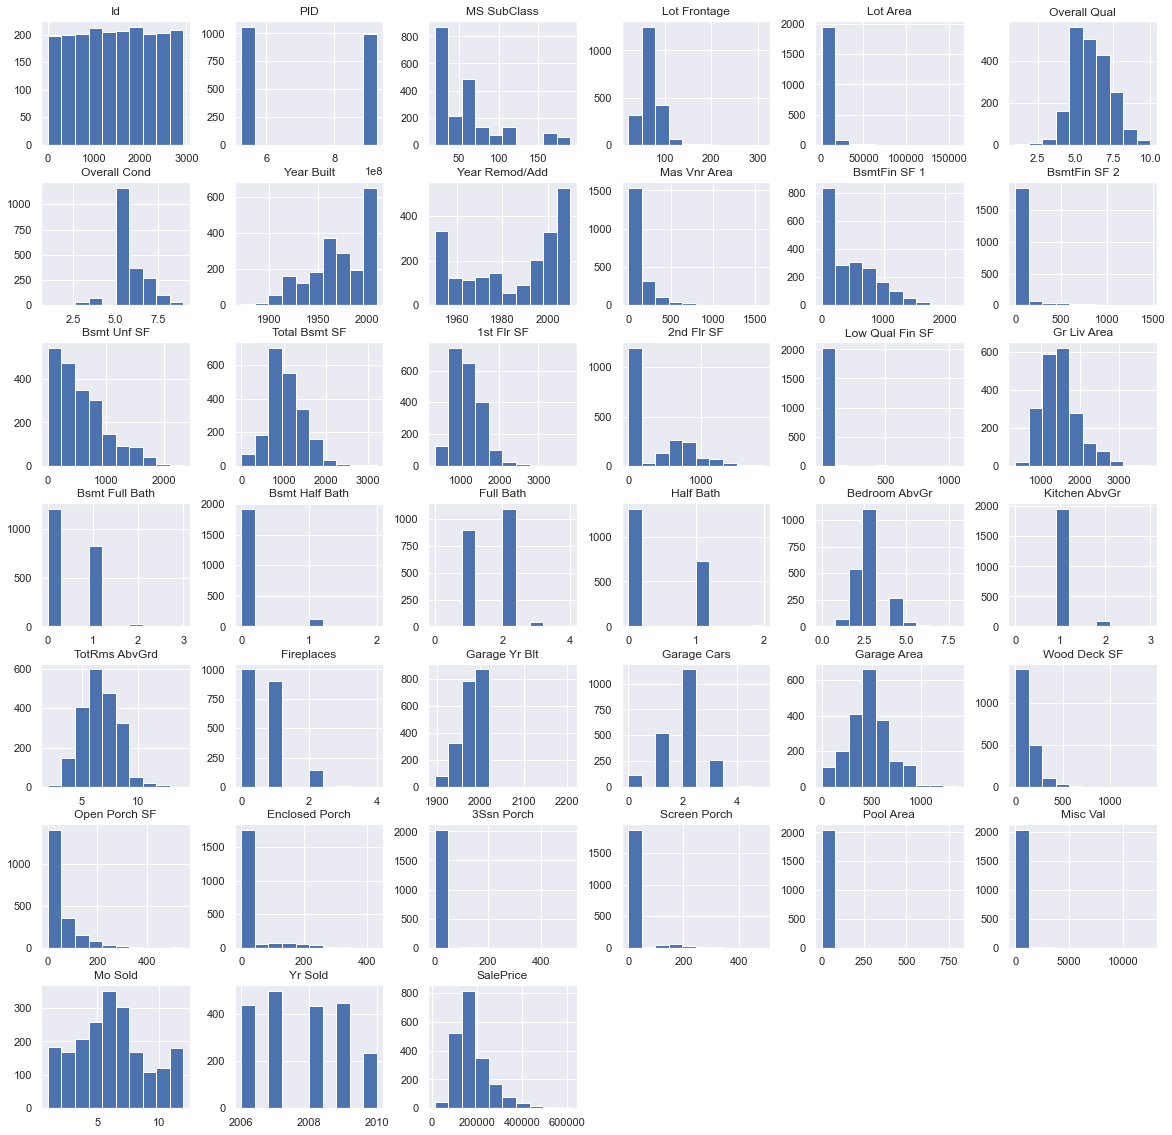

In [13]:
# Histrogram of the numerical variables distribution

train.hist(figsize=(20, 20));